In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Index assets

Building a mosaic is somewhat similar to the search algorithms discussed 
previously. For each image part, we want to replace it with a mosaic picture 
(a patch). We will run the search algorithm to find the best match from the
source images database.

To make this search fast, we will store preprocessed sources together with 
their feature vectors. More precisely, we will store:
  - a resized version of original
  - result of applying Sobel filter on the resized image
  - image description in the form of CSV file entry
  
The function is responsible for indexing sources `index_images` from the 
`mosaic_mager.index_assets` module. It uses `ImageProcessor` class from the 
`mosaic_maker.basic_processing.image_processor` module that will resize and 
create a Sobel version of the input. After these operations, both results are 
fed to the Patch class from the `mosaic_maker.patch.patchmodule` that will be 
responsible for creating a description of the input images.

The `Patch` class will also be used in mosaic creation. 

One could consider embedding Sobel operators in the `Patch` itself, but in the 
case of mosaic composing, we will want to apply them for the whole source 
image, not only currently processed part. This way, we'll have better values 
for patches' borders.

In this chapter, we will focus on the `ImageProcessor` implementation. `Patch`,
in its current version, will return dummy feature vectors, but we will feed it 
with properly rescaled and transformed images that will be stored in the 
`assets` directory.

Image processing will consist of three steps:
  1. Cropping image to the square shape - patches are square, so we will
  use only the central part fo the images leaving out the margins
  2. Applying Sobel filters
  3. Resizing cropped original and its Sobel version.
  

In [36]:
from config import IMAGES_SET, PATCH_SIZE
from mosaic_maker.index_assets import index_images


In [37]:
index_images(IMAGES_SET, PATCH_SIZE)


PROCESSING FILES:
  > 0299.jpg  DONE


After the running line above, the `indexed-sources` directory should appear in 
`assets`. In this directory, you will find another directory named after 
source images set name. It will contain processed images and a CSV file.

As `ImageProcessor` contains for now only dummy implementation, processed 
images will be the original images, and CSV will only contain empty lines 
with filenames in the first column. Let's work on the image processor. We will
use the target image generated in the previous chapter as our test input. 

In [38]:
import cv2
from matplotlib import pyplot as plt
from config import PROJECT_ROOT

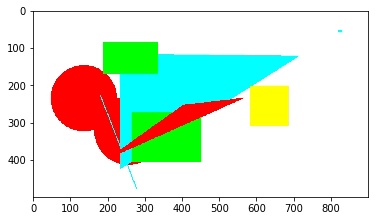

In [13]:
image_path = PROJECT_ROOT / 'assets/test-target.jpg'
test_image = cv2.imread(image_path.as_posix())
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

Let's create an `ImageProcessor` class instance for it.

For now, we will focus on the two fields of `ImageProcessor` class:
`cropped_image` and `sobel_magnitude_image`.


In [40]:
from mosaic_maker.basic_processing.image_processor import ImageProcessor

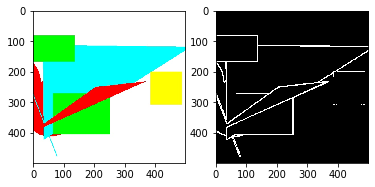

In [14]:
processed_test = ImageProcessor('test', test_image, PATCH_SIZE)

_, grid = plt.subplots(1, 2)
grid[0].imshow(cv2.cvtColor(processed_test.cropped_image, cv2.COLOR_BGR2RGB))
grid[1].imshow(processed_test.sobel_magnitude_image, cmap='gray')

As no of the functions is implemented yet, you should see two copies of the 
original image above.


Let's start with cropping the image to the center square of the size of the 
smaller image dimension.

Use basic `Numpy` indexing and shape field to achieve this target. You will 
find a description of the needed operators in the `Numpy`
[quickstart tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html).

You can train on `test_image` in this notebook to achieve required result.
After finding proper algorithm, modify `_crop_to_square` method of 
`ImageProcessor` to make it work within the class.  


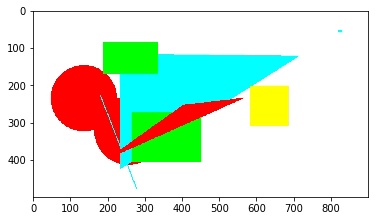

In [15]:
test_image_copy = test_image.copy() 

# do some sample operations on test image copy here

plt.imshow(cv2.cvtColor(test_image_copy, cv2.COLOR_BGR2RGB))

After fixing `crop_to_square` method block below should create two cropped
images.

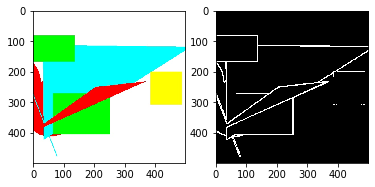

In [16]:
processed_test = ImageProcessor('test', test_image, PATCH_SIZE)

_, grid = plt.subplots(1, 2)
grid[0].imshow(cv2.cvtColor(processed_test.cropped_image, cv2.COLOR_BGR2RGB))
grid[1].imshow(processed_test.sobel_magnitude_image, cmap='gray')


Now let's work on Sobel filters. You've seen sample usage in OpenCV samples 
from the first exercises used for finding barcodes.

Applying Sobel filters will be more sophisticated than cropping images. You 
will have to perform the following steps:
  - Convert image to grayscale and blur the result - read 
  [changing colorspaces tutorial](https://docs.opencv.org/master/df/d9d/tutorial_py_colorspaces.html)
  and 
  [smoothing images tutorial](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html)
  - Calculate gradients read [image gradients tutorial](https://docs.opencv.org/master/d5/d0f/tutorial_py_gradients.html)
  to find instructions for build `x` and `y` Sobel images
  - process gradients first by applying 
  [`convertScaleAbs`](https://docs.opencv.org/4.2.0/d2/de8/group__core__array.html#ga3460e9c9f37b563ab9dd550c4d8c4e7d)
  function to remove signs and then by combining results using  
  [`addWeighted`](https://docs.opencv.org/4.2.0/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19)
  - to remove noises and unimportant edges threshold image - you can read
  about this operation in the [image thresholding tutorial](https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html)

Again you can work on the code block below and then apply results to the
`calculate_sobel_magnitude_image` method.

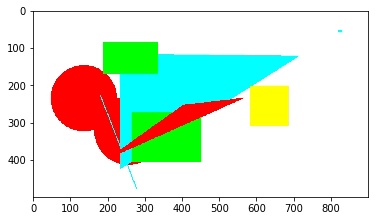

In [17]:
test_image_copy = test_image.copy() 

# do some sample operations on test image copy here

plt.imshow(cv2.cvtColor(test_image_copy, cv2.COLOR_BGR2RGB))

After applying all changes, you should see two different images below: one with
the cropped image and second with edges.


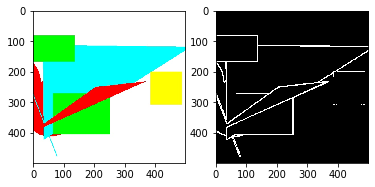

In [18]:
processed_test = ImageProcessor('test', test_image, PATCH_SIZE)

_, grid = plt.subplots(1, 2)
grid[0].imshow(cv2.cvtColor(processed_test.cropped_image, cv2.COLOR_BGR2RGB))
grid[1].imshow(processed_test.sobel_magnitude_image, cmap='gray')

We can now run again `index_images` function and check the results
in the `assets` directory.

In [19]:
index_images(IMAGES_SET, PATCH_SIZE)

PROCESSING FILES:
  > 0299.jpg  DONE
